In [1]:
import torch
from spin import create_J_matrix, SpinConfiguration
from modeling import IsingEnergyModel, SimpleIsingTBFlowModel, create_input_batch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
N = 4
J = create_J_matrix(N, sigma=1)

In [24]:
base_values = np.array([-1]*N**2, dtype=int)
magnetizations = []
energies = []

for i in range(2**(N**2)):
    new_spins = 2 * np.array([int(char) for char in np.binary_repr(i)]) - 1
    spin_values = base_values.copy()
    spin_values[-new_spins.shape[0]:] = new_spins
    spin_values = spin_values.reshape(N,N)
    spin = SpinConfiguration(N=N, values=spin_values)
    
    energies.append(spin.get_energy(J))
    magnetizations.append(spin.get_magnetization().abs())
    
energies = torch.stack(energies)
magnetizations = torch.stack(magnetizations)

In [42]:
Ts = np.arange(1, 100)
eff_magns = []

for T in Ts:
    relative_probs = torch.exp(-(1/T) * energies)
    partition_function = torch.sum(relative_probs)
    magn = torch.sum(magnetizations * relative_probs / partition_function)
    eff_magns.append(magn)

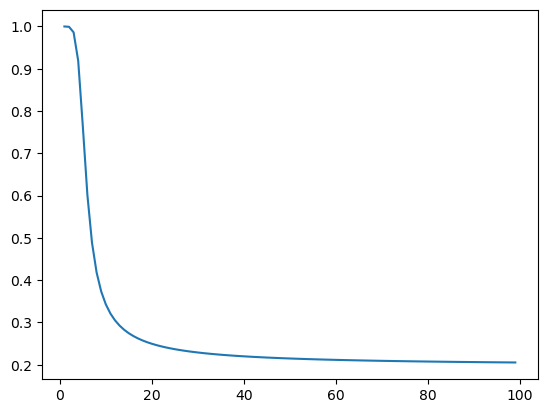

In [45]:
plt.plot(np.arange(1, 100), eff_magns)

In [5]:
model = SimpleIsingTBFlowModel(N=N)
model.load_state_dict(torch.load("model_TB_N4_T5.pt", map_location=device))

<All keys matched successfully>

In [6]:
state = create_input_batch(N=N, batch_size=100, device=device)

model.eval()
for _ in range(N**2):
    state = model.make_choice(state)

AttributeError: 'SimpleIsingTBFlowModel' object has no attribute 'make_choice'